## **0. Import Libraries**

In [316]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Avoid np.bool depreciation
np.bool = np.bool_

## **1. Load Datasets**

### **a. Training Data**

In [223]:
# Import Ozone dataset
ozone_df = pd.read_csv("../data/train/raw/daily_ozone_2023.csv")
ozone_df.head()

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_23153/3157047485.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  ozone_df = pd.read_csv("../data/train/raw/daily_ozone_2023.csv")


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,21,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,24,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,35,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,50,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24
4,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,44,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24


In [224]:
# Import SO2 dataset
so2_df = pd.read_csv("../data/train/raw/daily_so2_2023.csv")
so2_df.head()

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_23153/682462969.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  so2_df = pd.read_csv("../data/train/raw/daily_so2_2023.csv")


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,73,23,42401,2,33.553056,-86.815,WGS84,Sulfur dioxide,1 HOUR,...,0.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09
1,1,73,23,42401,2,33.553056,-86.815,WGS84,Sulfur dioxide,1 HOUR,...,0.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09
2,1,73,23,42401,2,33.553056,-86.815,WGS84,Sulfur dioxide,1 HOUR,...,0.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09
3,1,73,23,42401,2,33.553056,-86.815,WGS84,Sulfur dioxide,1 HOUR,...,0.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09
4,1,73,23,42401,2,33.553056,-86.815,WGS84,Sulfur dioxide,1 HOUR,...,1.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09


In [225]:
# Import CO dataset
co_df = pd.read_csv("../data/train/raw/daily_co_2023.csv")
co_df.head()

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_23153/3539876285.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  co_df = pd.read_csv("../data/train/raw/daily_co_2023.csv")


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,1 HOUR,...,NaN,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09
1,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,1 HOUR,...,NaN,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09
2,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,1 HOUR,...,NaN,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09
3,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,1 HOUR,...,NaN,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09
4,1,73,23,42101,2,33.553056,-86.815,WGS84,Carbon monoxide,1 HOUR,...,NaN,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09


In [226]:
# Import NO2 dataset
no2_df = pd.read_csv("../data/train/raw/daily_no2_2023.csv")
no2_df.head()

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_23153/1258597883.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  no2_df = pd.read_csv("../data/train/raw/daily_no2_2023.csv")


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,15,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22
1,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,8,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22
2,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,8,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22
3,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,27,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22
4,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,21,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22


In [227]:
# Import PM2.5 FRM/FEM Mass dataset
pm25_df = pd.read_csv("../data/train/raw/daily_pm2.5_mass_2023.csv")
pm25_df.head()

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_23153/2847464827.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pm25_df = pd.read_csv("../data/train/raw/daily_pm2.5_mass_2023.csv")


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,73,23,86101,1,33.553056,-86.815,WGS84,PM10-2.5 - Local Conditions,1 HOUR,...,NaN,240,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-01-31
1,1,73,23,86101,1,33.553056,-86.815,WGS84,PM10-2.5 - Local Conditions,1 HOUR,...,NaN,240,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-01-31
2,1,73,23,86101,1,33.553056,-86.815,WGS84,PM10-2.5 - Local Conditions,1 HOUR,...,NaN,240,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-01-31
3,1,73,23,86101,1,33.553056,-86.815,WGS84,PM10-2.5 - Local Conditions,1 HOUR,...,NaN,240,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-01-31
4,1,73,23,86101,1,33.553056,-86.815,WGS84,PM10-2.5 - Local Conditions,1 HOUR,...,NaN,240,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-01-31


In [228]:
# Import PM10 Mass dataset
pm10_df = pd.read_csv("../data/train/raw/daily_pm10_mass_2023.csv")
pm10_df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,73,23,81102,4,33.553056,-86.815,WGS84,PM10 Total 0-10um STP,24-HR BLK AVG,...,17,239,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22
1,1,73,23,81102,4,33.553056,-86.815,WGS84,PM10 Total 0-10um STP,24-HR BLK AVG,...,16,239,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22
2,1,73,23,81102,4,33.553056,-86.815,WGS84,PM10 Total 0-10um STP,24-HR BLK AVG,...,12,239,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22
3,1,73,23,81102,4,33.553056,-86.815,WGS84,PM10 Total 0-10um STP,24-HR BLK AVG,...,16,239,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22
4,1,73,23,81102,4,33.553056,-86.815,WGS84,PM10 Total 0-10um STP,24-HR BLK AVG,...,13,239,Teledyne API T640X at 16.67 LPM - Broadband sp...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22


In [229]:
# Import Winds dataset
wind_df = pd.read_csv("../data/train/raw/daily_WIND_2023.csv")
wind_df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
1,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
2,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
3,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
4,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19


In [230]:
# Import Temperature dataset
temp_df = pd.read_csv("../data/train/raw/daily_TEMP_2023.csv")
temp_df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
1,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
2,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
3,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
4,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19


In [231]:
# Import Barometric Pressure dataset
pressure_df = pd.read_csv("../data/train/raw/daily_PRESS_2023.csv")
pressure_df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
1,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
2,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
3,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
4,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19


In [232]:
# Import RH and Dewpoint dataset
rhdp_df = pd.read_csv("../data/train/raw/daily_RH_DP_2023.csv")
rhdp_df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
1,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
2,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
3,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19
4,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-01-19


In [233]:
# Import feature output dataset
aqi_df = pd.read_csv("../data/train/raw/daily_aqi_by_county_2023.csv")
aqi_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2023-01-10,47,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2023-01-11,38,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2023-01-12,30,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2023-01-13,24,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2023-01-14,27,Good,PM2.5,01-003-0010,1


### **b. Testing Data**

In [322]:
# Import Ozone test dataset
ozone_test = pd.read_csv("../data/test/raw/daily_ozone_2024.csv")
ozone_test.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,30,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,28,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,15,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,36,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
4,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,36,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19


In [323]:
# Import SO2 test dataset
so2_test = pd.read_csv("../data/test/raw/daily_so2_2024.csv")
so2_test.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,97,3,42401,1,30.770181,-88.087761,NAD83,Sulfur dioxide,1 HOUR,...,1.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,CHICKASAW,"Iroquois and Azalea, CHICKASAW, MOBILE CO., A...",Alabama,Mobile,Chickasaw,"Mobile, AL",2024-08-05
1,1,97,3,42401,1,30.770181,-88.087761,NAD83,Sulfur dioxide,1 HOUR,...,10.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,CHICKASAW,"Iroquois and Azalea, CHICKASAW, MOBILE CO., A...",Alabama,Mobile,Chickasaw,"Mobile, AL",2024-08-05
2,1,97,3,42401,1,30.770181,-88.087761,NAD83,Sulfur dioxide,1 HOUR,...,1.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,CHICKASAW,"Iroquois and Azalea, CHICKASAW, MOBILE CO., A...",Alabama,Mobile,Chickasaw,"Mobile, AL",2024-08-05
3,1,97,3,42401,1,30.770181,-88.087761,NAD83,Sulfur dioxide,1 HOUR,...,7.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,CHICKASAW,"Iroquois and Azalea, CHICKASAW, MOBILE CO., A...",Alabama,Mobile,Chickasaw,"Mobile, AL",2024-08-05
4,1,97,3,42401,1,30.770181,-88.087761,NAD83,Sulfur dioxide,1 HOUR,...,0.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,CHICKASAW,"Iroquois and Azalea, CHICKASAW, MOBILE CO., A...",Alabama,Mobile,Chickasaw,"Mobile, AL",2024-08-05


In [324]:
# Import CO test dataset
co_test = pd.read_csv("../data/test/raw/daily_co_2024.csv")
co_test.head()

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_23153/1589911934.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  co_test = pd.read_csv("../data/test/raw/daily_co_2024.csv")


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,2,20,18,42101,1,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,NaN,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2024-06-28
1,2,20,18,42101,1,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,NaN,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2024-06-28
2,2,20,18,42101,1,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,NaN,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2024-06-28
3,2,20,18,42101,1,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,NaN,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2024-06-28
4,2,20,18,42101,1,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,NaN,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2024-06-28


In [325]:
# Import NO2 test dataset
no2_test = pd.read_csv("../data/test/raw/daily_no2_2024.csv")
no2_test.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,4,13,19,42602,1,33.48378,-112.14256,NAD83,Nitrogen dioxide (NO2),1 HOUR,...,32,74,INSTRUMENTAL - CHEMILUMINESCENCE,WEST PHOENIX,3847 W EARLL DR-WEST PHOENIX STATION,Arizona,Maricopa,Phoenix,"Phoenix-Mesa-Scottsdale, AZ",2024-05-22
1,4,13,19,42602,1,33.48378,-112.14256,NAD83,Nitrogen dioxide (NO2),1 HOUR,...,38,74,INSTRUMENTAL - CHEMILUMINESCENCE,WEST PHOENIX,3847 W EARLL DR-WEST PHOENIX STATION,Arizona,Maricopa,Phoenix,"Phoenix-Mesa-Scottsdale, AZ",2024-05-22
2,4,13,19,42602,1,33.48378,-112.14256,NAD83,Nitrogen dioxide (NO2),1 HOUR,...,34,74,INSTRUMENTAL - CHEMILUMINESCENCE,WEST PHOENIX,3847 W EARLL DR-WEST PHOENIX STATION,Arizona,Maricopa,Phoenix,"Phoenix-Mesa-Scottsdale, AZ",2024-05-22
3,4,13,19,42602,1,33.48378,-112.14256,NAD83,Nitrogen dioxide (NO2),1 HOUR,...,29,74,INSTRUMENTAL - CHEMILUMINESCENCE,WEST PHOENIX,3847 W EARLL DR-WEST PHOENIX STATION,Arizona,Maricopa,Phoenix,"Phoenix-Mesa-Scottsdale, AZ",2024-05-22
4,4,13,19,42602,1,33.48378,-112.14256,NAD83,Nitrogen dioxide (NO2),1 HOUR,...,34,74,INSTRUMENTAL - CHEMILUMINESCENCE,WEST PHOENIX,3847 W EARLL DR-WEST PHOENIX STATION,Arizona,Maricopa,Phoenix,"Phoenix-Mesa-Scottsdale, AZ",2024-05-22


In [326]:
# Import PM2.5 FRM/FEM Mass test dataset
pm25_test = pd.read_csv("../data/test/raw/daily_pm2.5_mass_2024.csv")
pm25_test.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
1,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
2,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
3,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
4,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05


In [327]:
# Import PM10 Mass test dataset
pm10_test = pd.read_csv("../data/test/raw/daily_pm10_mass_2024.csv")
pm10_test.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,89,2,81102,1,34.788423,-86.616105,WGS84,PM10 Total 0-10um STP,24 HOUR,...,5,63,HI-VOL SA/GMW-1200 - GRAVIMETRIC,Fire Station #10,5006 PULASKI PIKE,Alabama,Madison,Huntsville,"Huntsville, AL",2024-06-28
1,1,89,2,81102,1,34.788423,-86.616105,WGS84,PM10 Total 0-10um STP,24 HOUR,...,6,63,HI-VOL SA/GMW-1200 - GRAVIMETRIC,Fire Station #10,5006 PULASKI PIKE,Alabama,Madison,Huntsville,"Huntsville, AL",2024-06-28
2,1,89,2,81102,1,34.788423,-86.616105,WGS84,PM10 Total 0-10um STP,24 HOUR,...,4,63,HI-VOL SA/GMW-1200 - GRAVIMETRIC,Fire Station #10,5006 PULASKI PIKE,Alabama,Madison,Huntsville,"Huntsville, AL",2024-06-28
3,1,89,2,81102,1,34.788423,-86.616105,WGS84,PM10 Total 0-10um STP,24 HOUR,...,6,63,HI-VOL SA/GMW-1200 - GRAVIMETRIC,Fire Station #10,5006 PULASKI PIKE,Alabama,Madison,Huntsville,"Huntsville, AL",2024-06-28
4,1,89,2,81102,1,34.788423,-86.616105,WGS84,PM10 Total 0-10um STP,24 HOUR,...,11,63,HI-VOL SA/GMW-1200 - GRAVIMETRIC,Fire Station #10,5006 PULASKI PIKE,Alabama,Madison,Huntsville,"Huntsville, AL",2024-06-28


In [328]:
# Import Winds test dataset
wind_test = pd.read_csv("../data/test/raw/daily_WIND_2024.csv")
wind_test.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
1,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
2,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
3,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
4,1,53,1000,61103,1,31.0921,-87.5435,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,67,Instrumental - RM Young Model 05103,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15


In [329]:
# Import Temperature test dataset
temp_test = pd.read_csv("../data/test/raw/daily_TEMP_2024.csv")
temp_test.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
1,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
2,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
3,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
4,1,53,1000,62101,1,31.0921,-87.5435,NAD83,Outdoor Temperature,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15


In [330]:
# Import Barometric Pressure test dataset
pressure_test = pd.read_csv("../data/test/raw/daily_PRESS_2024.csv")
pressure_test.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
1,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
2,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
3,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
4,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,1 HOUR,...,NaN,60,Instrumental - Vaisala 555B Pressure Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15


In [331]:
# Import RH and Dewpoint test dataset
rhdp_test = pd.read_csv("../data/test/raw/daily_RH_DP_2024.csv")
rhdp_test.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
1,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
2,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
3,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15
4,1,53,1000,62201,1,31.0921,-87.5435,NAD83,Relative Humidity,1 HOUR,...,NaN,60,Instrumental - Vaisala 435C RH/AT Sensor,PCI MET1,Jack Springs Rd,Alabama,Escambia,Not in a city,NaN,2024-07-15


In [332]:
# Import feature output test dataset
aqi_test = pd.read_csv("../data/test/raw/daily_aqi_by_county_2024.csv")
aqi_test.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2024-01-03,41,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2024-01-04,38,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2024-01-05,44,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2024-01-06,7,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2024-01-07,29,Good,PM2.5,01-003-0010,1


## **2. Data Transformation**

### **a. Training Data**

#### **i. Criteria Gases**

In [234]:
# Rename 'Arithmetic Mean' column in each dataframe for clarity
ozone_df.rename(columns={'Arithmetic Mean': 'Ozone Mean'}, inplace=True)
so2_df.rename(columns={'Arithmetic Mean': 'SO2 Mean'}, inplace=True)
co_df.rename(columns={'Arithmetic Mean': 'CO Mean'}, inplace=True)
no2_df.rename(columns={'Arithmetic Mean': 'NO2 Mean'}, inplace=True)

In [235]:
# Define commons column for merging
common_columns = [
    'State Code', 'County Code', 'Site Num', 'Date Local',
    'Latitude', 'Longitude', 'State Name', 'County Name', 'City Name'
]

In [236]:
# Merge the four dataframes on common columns, using suffixes to avoid column conflicts
gases_df = ozone_df.merge(
    so2_df, on=common_columns, how='inner', suffixes=('_ozone', '_so2')
).merge(
    co_df, on=common_columns, how='inner', suffixes=('', '_co')
).merge(
    no2_df, on=common_columns, how='inner', suffixes=('', '_no2')
)

In [237]:
# Select only the common columns and the renamed 'Arithmetic Mean' columns
gases_df = gases_df[common_columns + ['Ozone Mean', 'SO2 Mean', 'CO Mean', 'NO2 Mean']]
gases_df.head(20)

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,State Name,County Name,City Name,Ozone Mean,SO2 Mean,CO Mean,NO2 Mean
0,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,-0.087500,0.154167,5.237500
1,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,-0.087500,0.126316,5.237500
2,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,-0.062500,0.154167,5.237500
3,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,-0.062500,0.126316,5.237500
4,1,73,23,2023-01-02,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.019824,0.329167,0.120833,4.975000
5,1,73,23,2023-01-02,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.019824,0.329167,0.137500,4.975000
6,1,73,23,2023-01-02,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.019824,0.275000,0.120833,4.975000
7,1,73,23,2023-01-02,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.019824,0.275000,0.137500,4.975000
8,1,73,23,2023-01-03,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.021471,0.000000,0.116667,5.462500
9,1,73,23,2023-01-03,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.021471,0.000000,0.112500,5.462500


In [238]:
# Save to a CSV file for storage
gases_df.to_csv('../data/train/merged/daily_criteria_gases_2023.csv', index=False)

#### **ii. Particulates**

In [239]:
# Rename 'Arithmetic Mean' column in each dataframe for clarity
pm25_df.rename(columns={'Arithmetic Mean': 'PM2.5 Mean'}, inplace=True)
pm10_df.rename(columns={'Arithmetic Mean': 'PM10 Mean'}, inplace=True)

In [240]:
# Merge the two dataframes on common columns, using suffixes to avoid column conflicts
particulates_df = pm25_df.merge(
    pm10_df, on=common_columns, how='inner', suffixes=('_pm25', '_pm10')
)

In [241]:
# Select only the common columns and the renamed 'Arithmetic Mean' columns
particulates_df = particulates_df[common_columns + ['PM2.5 Mean', 'PM10 Mean']]
particulates_df.head(20)

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,State Name,County Name,City Name,PM2.5 Mean,PM10 Mean
0,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,5.666667,18
1,1,73,23,2023-01-02,33.553056,-86.815,Alabama,Jefferson,Birmingham,7.341667,17
2,1,73,23,2023-01-03,33.553056,-86.815,Alabama,Jefferson,Birmingham,6.279167,13
3,1,73,23,2023-01-03,33.553056,-86.815,Alabama,Jefferson,Birmingham,4.300000,13
4,1,73,23,2023-01-04,33.553056,-86.815,Alabama,Jefferson,Birmingham,11.704348,17
5,1,73,23,2023-01-05,33.553056,-86.815,Alabama,Jefferson,Birmingham,9.510000,14
6,1,73,23,2023-01-06,33.553056,-86.815,Alabama,Jefferson,Birmingham,12.991667,20
7,1,73,23,2023-01-06,33.553056,-86.815,Alabama,Jefferson,Birmingham,10.500000,20
8,1,73,23,2023-01-07,33.553056,-86.815,Alabama,Jefferson,Birmingham,14.670833,28
9,1,73,23,2023-01-08,33.553056,-86.815,Alabama,Jefferson,Birmingham,5.350000,13


In [242]:
# Save to a CSV file for storage
particulates_df.to_csv('../data/train/merged/daily_particulates_2023.csv', index=False)

#### **iii. Meteorological**

In [243]:
# Rename 'Arithmetic Mean' column in each dataframe for clarity
wind_df.rename(columns={'Arithmetic Mean': 'Wind Mean'}, inplace=True)
temp_df.rename(columns={'Arithmetic Mean': 'Temperature Mean'}, inplace=True)
pressure_df.rename(columns={'Arithmetic Mean': 'Pressure Mean'}, inplace=True)
rhdp_df.rename(columns={'Arithmetic Mean': 'RH and Dewpoint Mean'}, inplace=True)

In [244]:
# Merge the four dataframes on common columns, using suffixes to avoid column conflicts
meteorological_df = wind_df.merge(
    temp_df, on=common_columns, how='inner', suffixes=('_wind', '_temp')
).merge(
    pressure_df, on=common_columns, how='inner', suffixes=('', '_pressure')
).merge(
    rhdp_df, on=common_columns, how='inner', suffixes=('', 'rhdp')
)

In [245]:
# Select only the common columns and the renamed 'Arithmetic Mean' columns
meteorological_df = meteorological_df[common_columns + ['Wind Mean', 'Temperature Mean', 'Pressure Mean', 'RH and Dewpoint Mean']]
meteorological_df.head(20)

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,State Name,County Name,City Name,Wind Mean,Temperature Mean,Pressure Mean,RH and Dewpoint Mean
0,1,53,1000,2023-01-01,31.0921,-87.5435,Alabama,Escambia,Not in a city,1.970833,63.320833,1008.641667,80.345833
1,1,53,1000,2023-01-01,31.0921,-87.5435,Alabama,Escambia,Not in a city,117.375000,63.320833,1008.641667,80.345833
2,1,53,1000,2023-01-02,31.0921,-87.5435,Alabama,Escambia,Not in a city,4.904167,70.845833,1008.737500,87.804167
3,1,53,1000,2023-01-02,31.0921,-87.5435,Alabama,Escambia,Not in a city,64.125000,70.845833,1008.737500,87.804167
4,1,53,1000,2023-01-03,31.0921,-87.5435,Alabama,Escambia,Not in a city,7.287500,73.437500,1003.883333,85.512500
5,1,53,1000,2023-01-03,31.0921,-87.5435,Alabama,Escambia,Not in a city,90.625000,73.437500,1003.883333,85.512500
6,1,53,1000,2023-01-04,31.0921,-87.5435,Alabama,Escambia,Not in a city,4.187500,63.950000,1004.900000,74.395833
7,1,53,1000,2023-01-04,31.0921,-87.5435,Alabama,Escambia,Not in a city,163.500000,63.950000,1004.900000,74.395833
8,1,53,1000,2023-01-05,31.0921,-87.5435,Alabama,Escambia,Not in a city,3.537500,52.316667,1011.841667,71.379167
9,1,53,1000,2023-01-05,31.0921,-87.5435,Alabama,Escambia,Not in a city,182.708333,52.316667,1011.841667,71.379167


In [246]:
# Save to a CSV file for storage
meteorological_df.to_csv('../data/train/merged/daily_meteorological_2023.csv', index=False)

#### **iv. Unified Dataset**

In [247]:
# Merge all features dataframe into one
main_df = gases_df.merge(
    particulates_df, on=common_columns, how='inner'
).merge(
    meteorological_df, on=common_columns, how='inner'
)

In [248]:
# Rename 'Date' to 'Date Local' in the AQI DataFrame for consistency
aqi_df.rename(columns={'Date': 'Date Local'}, inplace=True)

In [249]:
# Extract 'Site Num' from the 'Defining Site' column in aqi_df
aqi_df['Site Num'] = aqi_df['Defining Site'].apply(lambda x: int(x.split('-')[-1]) if pd.notnull(x) else None)

# Drop the original 'Defining Site' 
aqi_df.drop(columns=['Defining Site'], inplace=True)

In [250]:
aqi_df.head()

,State Name,county Name,State Code,County Code,Date Local,AQI,Category,Defining Parameter,Number of Sites Reporting,Site Num
0,Alabama,Baldwin,1,3,2023-01-10,47,Good,PM2.5,1,10
1,Alabama,Baldwin,1,3,2023-01-11,38,Good,PM2.5,1,10
2,Alabama,Baldwin,1,3,2023-01-12,30,Good,PM2.5,1,10
3,Alabama,Baldwin,1,3,2023-01-13,24,Good,PM2.5,1,10
4,Alabama,Baldwin,1,3,2023-01-14,27,Good,PM2.5,1,10


In [251]:
# Merge with the main dataset for final dataset
main_df = main_df.merge(
    aqi_df[['State Code', 'County Code', 'Site Num', 'Date Local', 'AQI', 'Category']],
    on=['State Code', 'County Code', 'Site Num', 'Date Local'],
    how='inner'
)

In [252]:
# Display first 10 rows of final dataset
main_df.head(10)

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,State Name,County Name,City Name,Ozone Mean,...,CO Mean,NO2 Mean,PM2.5 Mean,PM10 Mean,Wind Mean,Temperature Mean,Pressure Mean,RH and Dewpoint Mean,AQI,Category
0,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,...,0.154167,5.2375,5.666667,18,2.729167,78.952174,998.495833,65.666667,58,Moderate
1,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,...,0.154167,5.2375,5.666667,18,218.250000,78.952174,998.495833,65.666667,58,Moderate
2,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,...,0.126316,5.2375,5.666667,18,2.729167,78.952174,998.495833,65.666667,58,Moderate
3,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,...,0.126316,5.2375,5.666667,18,218.250000,78.952174,998.495833,65.666667,58,Moderate
4,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,...,0.154167,5.2375,5.666667,18,2.729167,78.952174,998.495833,65.666667,58,Moderate
5,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,...,0.154167,5.2375,5.666667,18,218.250000,78.952174,998.495833,65.666667,58,Moderate
6,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,...,0.126316,5.2375,5.666667,18,2.729167,78.952174,998.495833,65.666667,58,Moderate
7,1,73,23,2023-01-01,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.031588,...,0.126316,5.2375,5.666667,18,218.250000,78.952174,998.495833,65.666667,58,Moderate
8,1,73,23,2023-01-02,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.019824,...,0.120833,4.9750,7.341667,17,4.412500,75.758333,999.058333,76.041667,53,Moderate
9,1,73,23,2023-01-02,33.553056,-86.815,Alabama,Jefferson,Birmingham,0.019824,...,0.120833,4.9750,7.341667,17,193.583333,75.758333,999.058333,76.041667,53,Moderate


In [253]:
# Save to a CSV file for storage
main_df.to_csv('../data/train/merged/daily_air_quality_data_2023.csv', index=False)

### **b. Testing Data**

#### **i. Criteria Gases**

In [333]:
# Rename 'Arithmetic Mean' column in each dataframe for clarity
ozone_test.rename(columns={'Arithmetic Mean': 'Ozone Mean'}, inplace=True)
so2_test.rename(columns={'Arithmetic Mean': 'SO2 Mean'}, inplace=True)
co_test.rename(columns={'Arithmetic Mean': 'CO Mean'}, inplace=True)
no2_test.rename(columns={'Arithmetic Mean': 'NO2 Mean'}, inplace=True)

In [334]:
# Merge the four dataframes on common columns, using suffixes to avoid column conflicts
gases_test = ozone_test.merge(
    so2_test, on=common_columns, how='inner', suffixes=('_ozone', '_so2')
).merge(
    co_test, on=common_columns, how='inner', suffixes=('', '_co')
).merge(
    no2_test, on=common_columns, how='inner', suffixes=('', '_no2')
)

In [335]:
# Select only the common columns and the renamed 'Arithmetic Mean' columns
gases_test = gases_test[common_columns + ['Ozone Mean', 'SO2 Mean', 'CO Mean', 'NO2 Mean']]
gases_test.head(20)

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,State Name,County Name,City Name,Ozone Mean,SO2 Mean,CO Mean,NO2 Mean
0,4,13,3002,2024-01-01,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.007882,0.583333,1.087500,22.083333
1,4,13,3002,2024-01-01,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.007882,0.583333,1.057895,22.083333
2,4,13,3002,2024-01-01,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.007882,0.562500,1.087500,22.083333
3,4,13,3002,2024-01-01,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.007882,0.562500,1.057895,22.083333
4,4,13,3002,2024-01-02,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.012765,0.500000,0.541667,25.041667
5,4,13,3002,2024-01-02,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.012765,0.500000,0.495833,25.041667
6,4,13,3002,2024-01-02,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.012765,0.475000,0.541667,25.041667
7,4,13,3002,2024-01-02,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.012765,0.475000,0.495833,25.041667
8,4,13,3002,2024-01-03,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.026824,0.083333,0.191667,16.416667
9,4,13,3002,2024-01-03,33.45797,-112.04659,Arizona,Maricopa,Phoenix,0.026824,0.083333,0.320833,16.416667


In [336]:
# Save to a CSV file for storage
gases_test.to_csv('../data/test/merged/daily_criteria_gases_2024.csv', index=False)

#### **ii. Particulates**

In [337]:
# Rename 'Arithmetic Mean' column in each dataframe for clarity
pm25_test.rename(columns={'Arithmetic Mean': 'PM2.5 Mean'}, inplace=True)
pm10_test.rename(columns={'Arithmetic Mean': 'PM10 Mean'}, inplace=True)

In [338]:
# Merge the two dataframes on common columns, using suffixes to avoid column conflicts
particulates_test = pm25_test.merge(
    pm10_test, on=common_columns, how='inner', suffixes=('_pm25', '_pm10')
)

In [339]:
# Select only the common columns and the renamed 'Arithmetic Mean' columns
particulates_test = particulates_test[common_columns + ['PM2.5 Mean', 'PM10 Mean']]
particulates_test.head(20)

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,State Name,County Name,City Name,PM2.5 Mean,PM10 Mean
0,1,89,14,2024-01-01,34.68547,-86.58816,Alabama,Madison,Huntsville,4.500000,9
1,1,89,14,2024-01-01,34.68547,-86.58816,Alabama,Madison,Huntsville,4.700000,9
2,1,89,14,2024-01-01,34.68547,-86.58816,Alabama,Madison,Huntsville,6.833333,9
3,1,89,14,2024-01-01,34.68547,-86.58816,Alabama,Madison,Huntsville,6.800000,9
4,1,89,14,2024-01-04,34.68547,-86.58816,Alabama,Madison,Huntsville,14.000000,26
5,1,89,14,2024-01-04,34.68547,-86.58816,Alabama,Madison,Huntsville,16.470833,26
6,1,89,14,2024-01-04,34.68547,-86.58816,Alabama,Madison,Huntsville,16.400000,26
7,1,89,14,2024-01-07,34.68547,-86.58816,Alabama,Madison,Huntsville,3.900000,9
8,1,89,14,2024-01-07,34.68547,-86.58816,Alabama,Madison,Huntsville,4.000000,9
9,1,89,14,2024-01-07,34.68547,-86.58816,Alabama,Madison,Huntsville,6.454167,9


In [340]:
# Save to a CSV file for storage
particulates_test.to_csv('../data/test/merged/daily_particulates_2024.csv', index=False)

#### **iii. Meteorological**

In [341]:
# Rename 'Arithmetic Mean' column in each dataframe for clarity
wind_test.rename(columns={'Arithmetic Mean': 'Wind Mean'}, inplace=True)
temp_test.rename(columns={'Arithmetic Mean': 'Temperature Mean'}, inplace=True)
pressure_test.rename(columns={'Arithmetic Mean': 'Pressure Mean'}, inplace=True)
rhdp_test.rename(columns={'Arithmetic Mean': 'RH and Dewpoint Mean'}, inplace=True)

In [342]:
# Merge the four dataframes on common columns, using suffixes to avoid column conflicts
meteorological_test = wind_test.merge(
    temp_test, on=common_columns, how='inner', suffixes=('_wind', '_temp')
).merge(
    pressure_test, on=common_columns, how='inner', suffixes=('', '_pressure')
).merge(
    rhdp_test, on=common_columns, how='inner', suffixes=('', 'rhdp')
)

In [343]:
# Select only the common columns and the renamed 'Arithmetic Mean' columns
meteorological_test = meteorological_test[common_columns + ['Wind Mean', 'Temperature Mean', 'Pressure Mean', 'RH and Dewpoint Mean']]
meteorological_test.head(20)

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,State Name,County Name,City Name,Wind Mean,Temperature Mean,Pressure Mean,RH and Dewpoint Mean
0,1,53,1000,2024-01-01,31.0921,-87.5435,Alabama,Escambia,Not in a city,4.225000,46.337500,1012.133333,73.829167
1,1,53,1000,2024-01-01,31.0921,-87.5435,Alabama,Escambia,Not in a city,277.333333,46.337500,1012.133333,73.829167
2,1,53,1000,2024-01-02,31.0921,-87.5435,Alabama,Escambia,Not in a city,3.187500,38.925000,1013.787500,71.008333
3,1,53,1000,2024-01-02,31.0921,-87.5435,Alabama,Escambia,Not in a city,107.958333,38.925000,1013.787500,71.008333
4,1,53,1000,2024-01-03,31.0921,-87.5435,Alabama,Escambia,Not in a city,4.779167,42.487500,1008.520833,83.125000
5,1,53,1000,2024-01-03,31.0921,-87.5435,Alabama,Escambia,Not in a city,97.541667,42.487500,1008.520833,83.125000
6,1,53,1000,2024-01-04,31.0921,-87.5435,Alabama,Escambia,Not in a city,3.745833,41.266667,1010.791667,77.066667
7,1,53,1000,2024-01-04,31.0921,-87.5435,Alabama,Escambia,Not in a city,142.833333,41.266667,1010.791667,77.066667
8,1,53,1000,2024-01-05,31.0921,-87.5435,Alabama,Escambia,Not in a city,8.325000,48.466667,1004.854167,80.420833
9,1,53,1000,2024-01-05,31.0921,-87.5435,Alabama,Escambia,Not in a city,108.666667,48.466667,1004.854167,80.420833


In [344]:
# Save to a CSV file for storage
meteorological_test.to_csv('../data/test/merged/daily_meteorological_2024.csv', index=False)

#### **iv. Unified Dataset**

In [345]:
# Merge all features dataframe into one
main_test = gases_test.merge(
    particulates_test, on=common_columns, how='inner'
).merge(
    meteorological_test, on=common_columns, how='inner'
)

In [346]:
# Rename 'Date' to 'Date Local' in the AQI DataFrame for consistency
aqi_test.rename(columns={'Date': 'Date Local'}, inplace=True)

In [347]:
# Extract 'Site Num' from the 'Defining Site' column in aqi_df
aqi_test['Site Num'] = aqi_test['Defining Site'].apply(lambda x: int(x.split('-')[-1]) if pd.notnull(x) else None)

# Drop the original 'Defining Site' 
aqi_test.drop(columns=['Defining Site'], inplace=True)

In [348]:
aqi_test.head()

,State Name,county Name,State Code,County Code,Date Local,AQI,Category,Defining Parameter,Number of Sites Reporting,Site Num
0,Alabama,Baldwin,1,3,2024-01-03,41,Good,PM2.5,1,10
1,Alabama,Baldwin,1,3,2024-01-04,38,Good,PM2.5,1,10
2,Alabama,Baldwin,1,3,2024-01-05,44,Good,PM2.5,1,10
3,Alabama,Baldwin,1,3,2024-01-06,7,Good,PM2.5,1,10
4,Alabama,Baldwin,1,3,2024-01-07,29,Good,PM2.5,1,10


In [349]:
# Merge with the main dataset for final dataset
main_test = main_test.merge(
    aqi_test[['State Code', 'County Code', 'Site Num', 'Date Local', 'AQI', 'Category']],
    on=['State Code', 'County Code', 'Site Num', 'Date Local'],
    how='inner'
)

In [351]:
# Display first 10 rows of final test dataset
main_test.head(10)

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,State Name,County Name,City Name,Ozone Mean,...,CO Mean,NO2 Mean,PM2.5 Mean,PM10 Mean,Wind Mean,Temperature Mean,Pressure Mean,RH and Dewpoint Mean,AQI,Category
0,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.25375,10.591667,4.416667,16,2.758333,72.291667,969.2375,35.125,58,Moderate
1,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.25375,10.591667,4.416667,16,124.625000,72.291667,969.2375,35.125,58,Moderate
2,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.25375,10.591667,4.400000,16,2.758333,72.291667,969.2375,35.125,58,Moderate
3,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.25375,10.591667,4.400000,16,124.625000,72.291667,969.2375,35.125,58,Moderate
4,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.31250,10.591667,4.416667,16,2.758333,72.291667,969.2375,35.125,58,Moderate
5,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.31250,10.591667,4.416667,16,124.625000,72.291667,969.2375,35.125,58,Moderate
6,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.31250,10.591667,4.400000,16,2.758333,72.291667,969.2375,35.125,58,Moderate
7,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.31250,10.591667,4.400000,16,124.625000,72.291667,969.2375,35.125,58,Moderate
8,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.25375,10.591667,4.416667,16,2.758333,72.291667,969.2375,35.125,58,Moderate
9,4,13,9997,2024-04-04,33.503833,-112.095767,Arizona,Maricopa,Phoenix,0.048118,...,0.25375,10.591667,4.416667,16,124.625000,72.291667,969.2375,35.125,58,Moderate


In [355]:
# Save to a CSV file for storage
main_test.to_csv('../data/test/merged/daily_air_quality_data_2024.csv', index=False)

## **3. Data Cleaning**

First, we will reload the dataframe just to ensure that we have the correct processed one.

In [217]:
# Reload the dataset to re-ensure 
main_df = pd.read_csv("../data/train/merged/daily_air_quality_data_2023.csv")
main_df.head(10)

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,State Name,County Name,City Name,Ozone Mean,...,CO Mean,NO2 Mean,PM2.5 Mean,PM10 Mean,Wind Mean,Temperature Mean,Pressure Mean,RH and Dewpoint Mean,AQI,Category
0,1,3,10,2023-02-28,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.023000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,Moderate
1,1,3,10,2023-03-01,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.025529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,Good
2,1,3,10,2023-03-02,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.031412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,Moderate
3,1,3,10,2023-03-03,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.042882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,Moderate
4,1,3,10,2023-03-04,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.037294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,Good
5,1,3,10,2023-03-05,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.030471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,Moderate
6,1,3,10,2023-03-06,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.020471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,Moderate
7,1,3,10,2023-03-07,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.022529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,Good
8,1,3,10,2023-03-08,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.036765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,Moderate
9,1,3,10,2023-03-09,30.497478,-87.880258,Alabama,Baldwin,Fairhope,0.027118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,Moderate


Since, from our merging process, we are ensured that our dataset doesn't have any missing values. Here is a double-check for that:

In [257]:
# Basic information on main_df
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46768 entries, 0 to 46767
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State Code            46768 non-null  int64  
 1   County Code           46768 non-null  int64  
 2   Site Num              46768 non-null  int64  
 3   Date Local            46768 non-null  object 
 4   Latitude              46768 non-null  float64
 5   Longitude             46768 non-null  float64
 6   State Name            46768 non-null  object 
 7   County Name           46768 non-null  object 
 8   City Name             46768 non-null  object 
 9   Ozone Mean            46768 non-null  float64
 10  SO2 Mean              46768 non-null  float64
 11  CO Mean               46768 non-null  float64
 12  NO2 Mean              46768 non-null  float64
 13  PM2.5 Mean            46768 non-null  float64
 14  PM10 Mean             46768 non-null  int64  
 15  Wind Mean          

We also check this information on test set to double check if our data transformation pipeline above works as expected:

In [356]:
# Basic information on main_df
main_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37120 entries, 0 to 37119
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State Code            37120 non-null  int64  
 1   County Code           37120 non-null  int64  
 2   Site Num              37120 non-null  int64  
 3   Date Local            37120 non-null  object 
 4   Latitude              37120 non-null  float64
 5   Longitude             37120 non-null  float64
 6   State Name            37120 non-null  object 
 7   County Name           37120 non-null  object 
 8   City Name             37120 non-null  object 
 9   Ozone Mean            37120 non-null  float64
 10  SO2 Mean              37120 non-null  float64
 11  CO Mean               37120 non-null  float64
 12  NO2 Mean              37120 non-null  float64
 13  PM2.5 Mean            37120 non-null  float64
 14  PM10 Mean             37120 non-null  int64  
 15  Wind Mean          

### **a. Duplicates Removal**

First, we check for duplicate observations in the training dataset that could affect the model training process, as well as duplicates in the test dataset to avoid introducing biases.

In [260]:
# Number of duplicates in the training dataframe
main_df.duplicated().sum()

4228

In [262]:
# Remove duplicate rows
main_df = main_df.drop_duplicates()

# Confirm duplicates have been removed
print(f"Number of duplicates remaining: {main_df.duplicated().sum()}")

Number of duplicates remaining: 0


### **b. Date Handling**

In [265]:
# Convert 'Date Local' to datetime format
main_df['Date Local'] = pd.to_datetime(main_df['Date Local'])

# Extract useful date components (e.g., year, month, day)
main_df['Year']  = main_df['Date Local'].dt.year
main_df['Month'] = main_df['Date Local'].dt.month
main_df['Day']   = main_df['Date Local'].dt.day

# Check for gaps in the time-series data (optional)
date_range = pd.date_range(start=main_df['Date Local'].min(), end=main_df['Date Local'].max())
missing_dates = date_range.difference(main_df['Date Local'])

print(f"Number of missing dates: {len(missing_dates)}")

Number of missing dates: 0


### **c. Correlation and Multicollinearity**

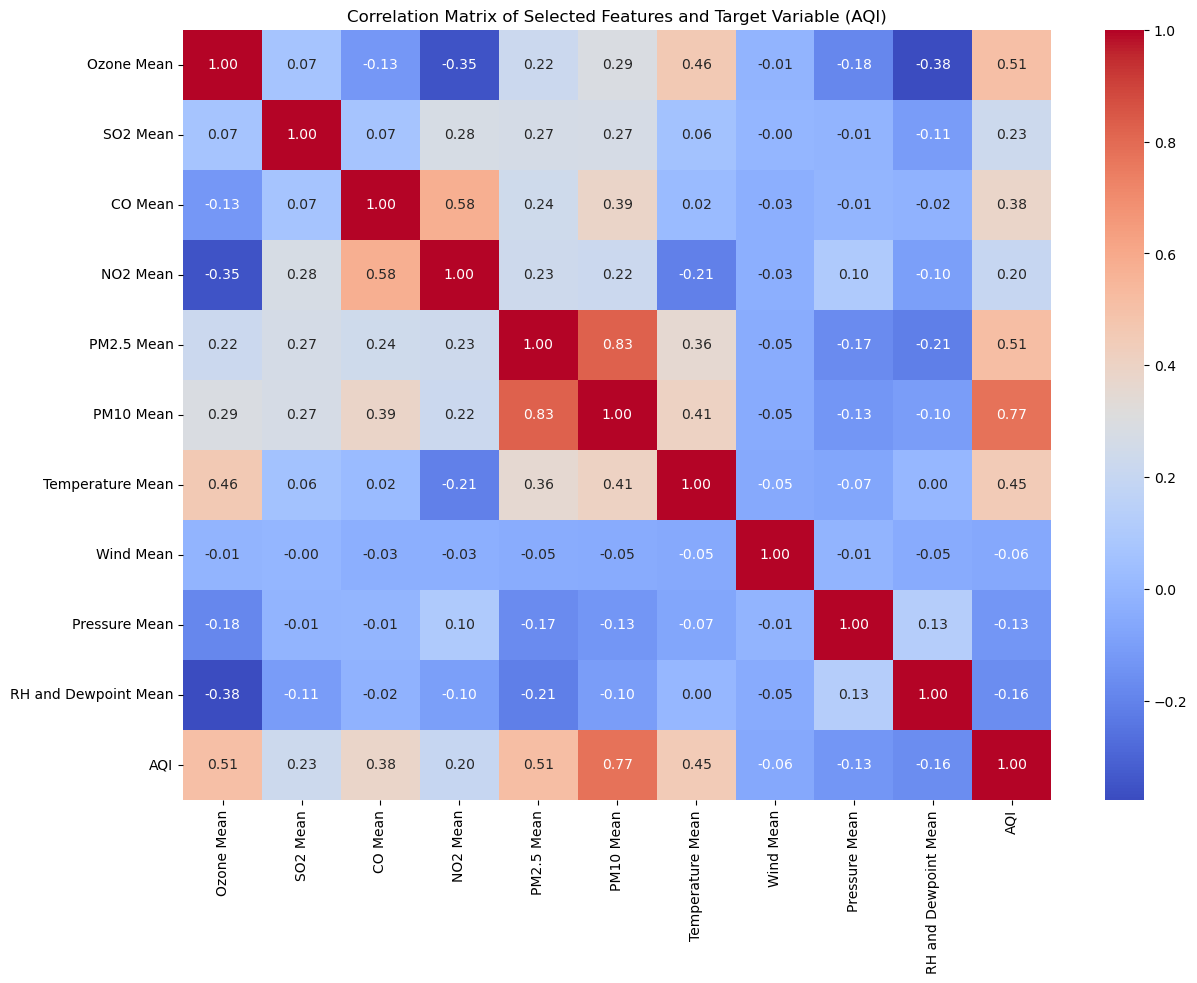

Highly correlated feature pairs with correlation > 0.9: None


In [269]:
# List of variables to check for correlation
corr_vars = ['Ozone Mean', 'SO2 Mean', 'CO Mean', 'NO2 Mean', 'PM2.5 Mean', 
             'PM10 Mean', 'Temperature Mean', 'Wind Mean', 'Pressure Mean', 
             'RH and Dewpoint Mean', 'AQI']

# Calculate the correlation matrix for the specified variables
correlation_matrix = main_df[corr_vars].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features and Target Variable (AQI)')
plt.show()

# Identify highly correlated feature pairs (correlation > 0.9)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                   for x, y in zip(*np.where(correlation_matrix > 0.9))
                   if x != y and x < y]

print("Highly correlated feature pairs with correlation > 0.9:", end=" ")
if high_corr_pairs:
    print(high_corr_pairs)
else:
    print("None")

## **4. Exploratory Data Analysis (EDA)**

In [271]:
# Numerical summary of main_df
main_df.describe()

,State Code,County Code,Site Num,Date Local,Latitude,Longitude,Ozone Mean,SO2 Mean,CO Mean,NO2 Mean,PM2.5 Mean,PM10 Mean,Wind Mean,Temperature Mean,Pressure Mean,RH and Dewpoint Mean,AQI,Year,Month,Day
count,42540.000000,42540.000000,42540.000000,42540,42540.000000,42540.000000,42540.000000,42540.000000,42540.000000,42540.000000,42540.000000,42540.000000,42540.000000,42540.000000,42540.000000,42540.000000,42540.000000,42540.0,42540.000000,42540.000000
mean,29.328444,94.513305,124.003573,2023-07-11 19:34:24.541607936,37.943704,-83.952859,0.031272,0.317210,0.257775,7.513589,8.928110,18.936718,97.340827,61.354269,997.724033,63.124399,53.813869,2023.0,6.839022,16.062811
min,1.000000,1.000000,2.000000,2023-01-01 00:00:00,29.670025,-122.308628,0.001000,-1.113043,-0.100000,-0.241667,-2.578947,1.000000,0.000000,-11.000000,828.375000,10.750000,13.000000,2023.0,1.000000,1.000000
25%,13.000000,15.000000,14.000000,2023-04-21 00:00:00,35.134300,-90.198348,0.022647,0.025000,0.189091,4.078947,5.000000,11.000000,2.775000,49.458333,990.729167,53.500000,40.000000,2023.0,4.000000,8.000000
50%,29.000000,87.000000,20.000000,2023-07-11 00:00:00,37.556520,-84.290500,0.030677,0.170833,0.229167,6.147619,7.458333,16.000000,40.583333,62.833333,1001.895833,64.416667,51.000000,2023.0,7.000000,16.000000
75%,48.000000,89.000000,43.000000,2023-10-09 00:00:00,40.465420,-77.400270,0.039647,0.466667,0.300417,9.917391,10.933333,23.000000,191.458333,74.125000,1011.400000,74.375000,61.000000,2023.0,10.000000,24.000000
max,56.000000,510.000000,9997.000000,2023-12-31 00:00:00,47.568236,-71.082600,0.072176,4.066667,1.270833,36.913043,173.722222,303.000000,347.083333,105.000000,1096.604167,99.958333,272.000000,2023.0,12.000000,31.000000
std,16.522988,129.922517,841.795247,NaN,3.833098,9.472598,0.011851,0.440663,0.129357,4.989975,7.050282,13.509080,104.660150,15.798429,31.138213,16.160418,21.590257,0.0,3.320070,8.829618


/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


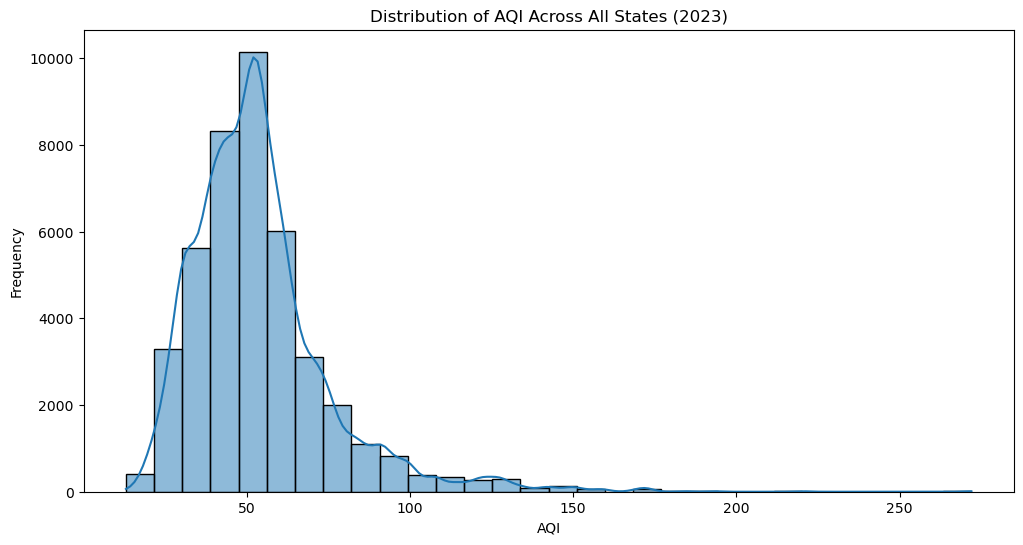

In [273]:
# Figure 1: Plot distribution of AQI across all states
plt.figure(figsize=(12, 6))
sns.histplot(main_df['AQI'], kde=True, bins=30)
plt.title('Distribution of AQI Across All States (2023)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

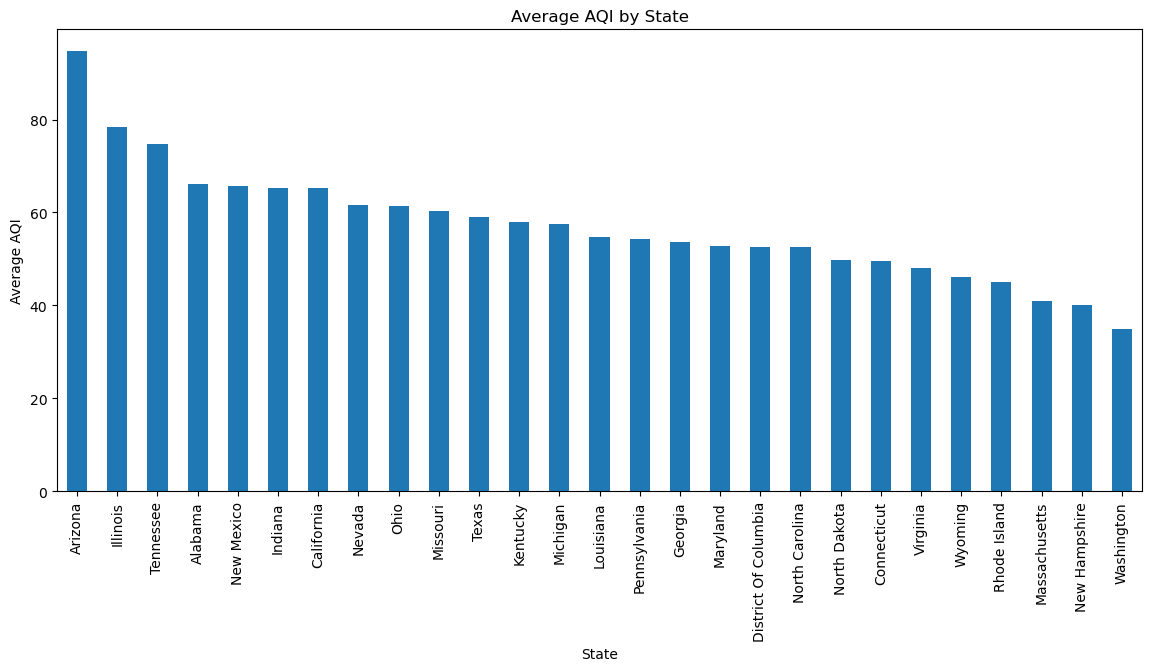

In [280]:
# Plot 2: Average AQI by state
state_aqi = main_df.groupby('State Name')['AQI'].mean().sort_values(ascending=False)
state_aqi.plot(kind='bar', figsize=(14, 6))
plt.title('Average AQI by State')
plt.xlabel('State')
plt.ylabel('Average AQI')
plt.show()


/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

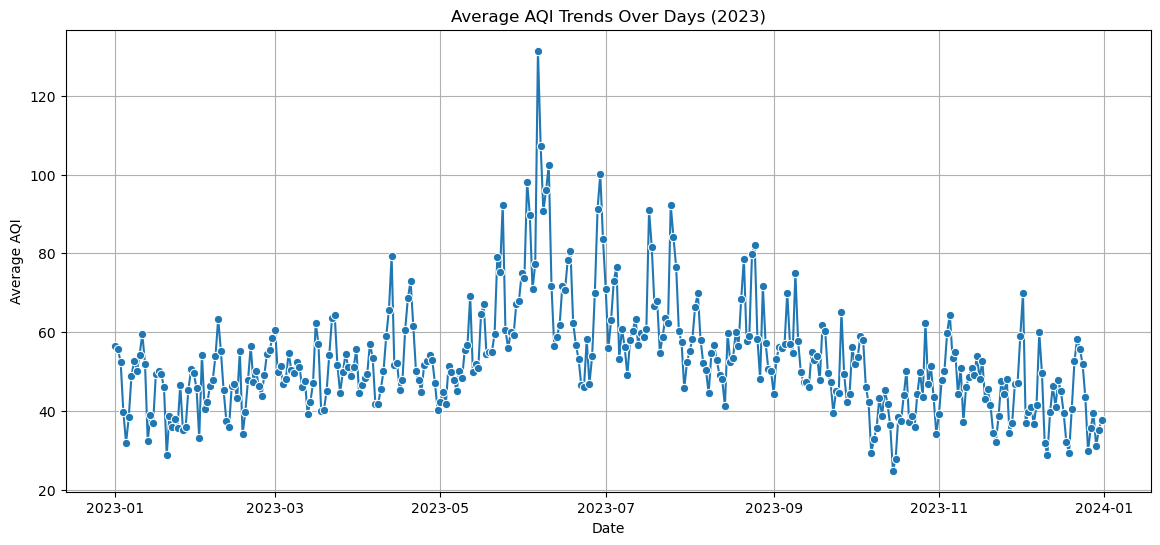

In [282]:
# Figure 3: Average AQI trends over days
daily_aqi = main_df.groupby('Date Local')['AQI'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_aqi, x='Date Local', y='AQI', marker='o')
plt.title('Average AQI Trends Over Days (2023)')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()


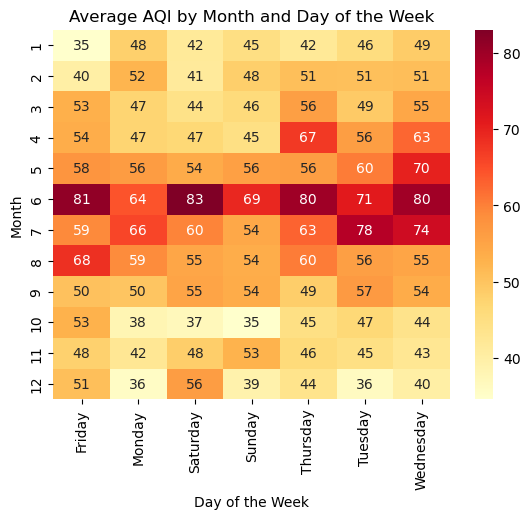

In [287]:
# Figure 4: Average AQI by month and day of the week
main_df['Day of Week'] = main_df['Date Local'].dt.day_name()
month_day_aqi = main_df.groupby(['Month', 'Day of Week'])['AQI'].mean().unstack()
sns.heatmap(month_day_aqi, annot=True, cmap='YlOrRd')
plt.title('Average AQI by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

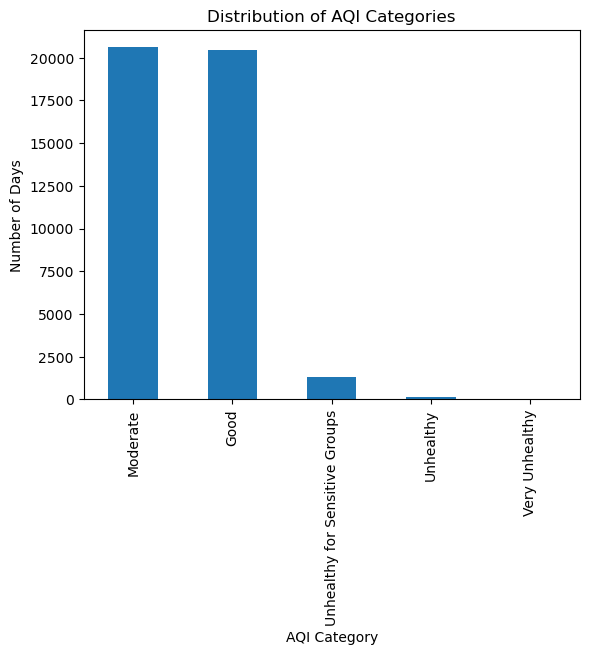

In [290]:
# Plot 5: AQI Category Distribution
category_counts = main_df['Category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Number of Days')
plt.show()

/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

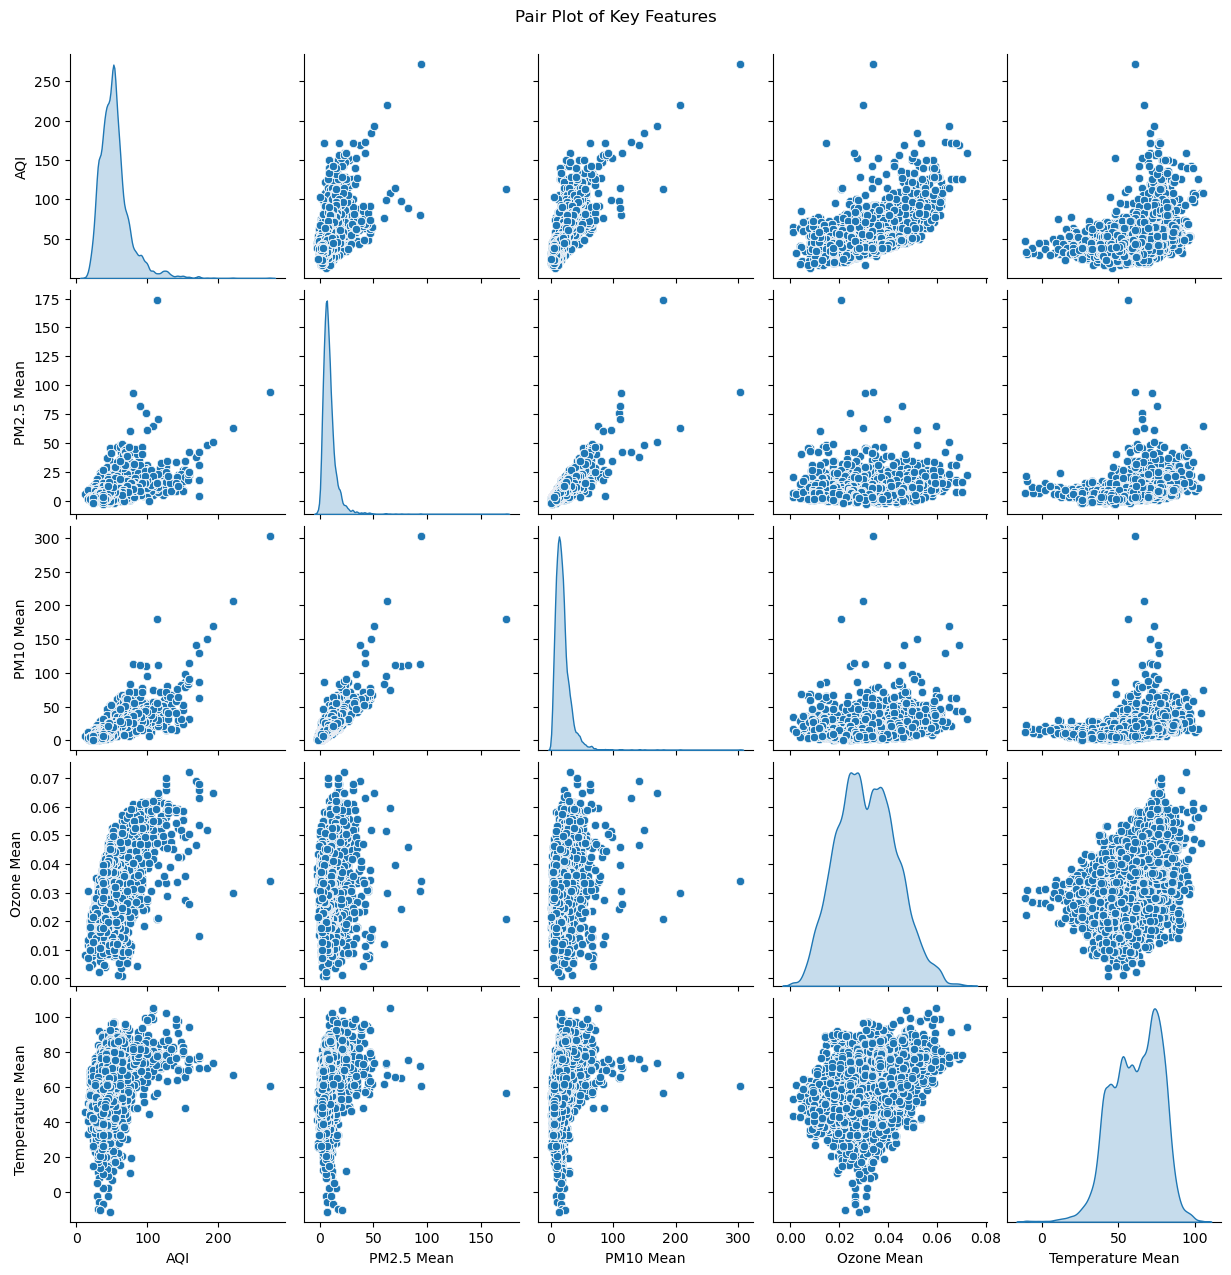

In [299]:
# Figure 6: Pair plot of multiple features
sns.pairplot(main_df, vars=['AQI', 'PM2.5 Mean', 'PM10 Mean', 'Ozone Mean', 'Temperature Mean'], diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

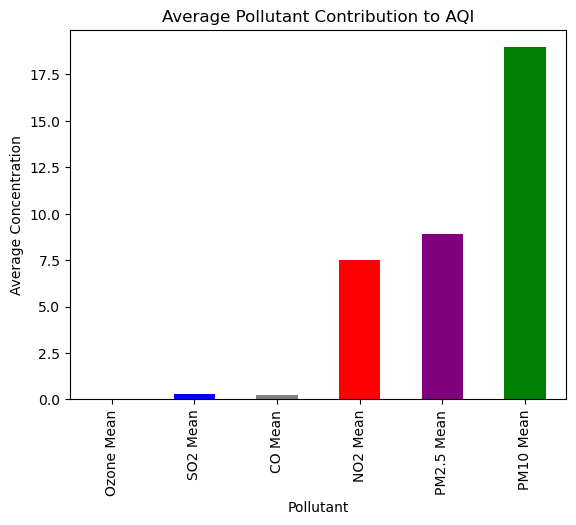

In [295]:
# Plot 7: Pollutant Contribution Analysis
pollutants = ['Ozone Mean', 'SO2 Mean', 'CO Mean', 'NO2 Mean', 'PM2.5 Mean', 'PM10 Mean']
main_df[pollutants].mean().plot(kind='bar', stacked=True, color=['orange', 'blue', 'gray', 'red', 'purple', 'green'])
plt.title('Average Pollutant Contribution to AQI')
plt.xlabel('Pollutant')
plt.ylabel('Average Concentration')
plt.show()

In [310]:
# Plot 8: Interactive map to visualize AQI readings geographically
# Create a base map
m = folium.Map(location=[main_df['Latitude'].mean(), main_df['Longitude'].mean()], zoom_start=5)

# Add AQI data points
for _, row in main_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"AQI: {row['AQI']}",
        color='red' if row['AQI'] > 100 else 'green',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Save map as HTML file
file_path = "aqi_map.html"
m.save(file_path)

## **5. LSTM Model Implementation for AQI Prediction**

### **a. Data Preparation**

In [301]:
# Select features and the target variable
features = ['Month', 'Day', 'Latitude', 'Longitude', 'Ozone Mean', 'SO2 Mean', 
            'CO Mean', 'NO2 Mean', 'PM2.5 Mean', 'PM10 Mean', 
            'Wind Mean', 'Temperature Mean', 'Pressure Mean', 'RH and Dewpoint Mean']
target = 'AQI'

In [321]:
# Scale the training features using MinMaxScaler
scaler = MinMaxScaler()
scaled_features_train = scaler.fit_transform(main_df[features])

In [318]:
# Create sequences for LSTM input (using a window of 30 days)
sequence_length = 30
X_train, y_train = [], []
for i in range(sequence_length, len(scaled_features_train)):
    X_train.append(scaled_features_train[i-sequence_length:i])
    y_train.append(main_df[target].iloc[i])

X_train, y_train = np.array(X_train), np.array(y_train)

### **b. Building the LSTM Model**

In [320]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

ValueError: Value returned by __array__ is not a NumPy array

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Display model summary
model.summary()

### **c. Model Training**

In [ ]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

### **d. Model Evaluating**